Stimulation devices
===================

Silent substitution requires a stimulation device with at least as many primaries as there are photoreceptors under consideration. This generally means that [5 primaries are needed](./01_background.rst), although 4 primaries may suffice when working in the photopic range as rod photoreceptors are thought to become saturated and incapable of signalling above 300 cd/m$^2$ ([Aguiller and Stiles, 1954](https://doi.org/10.1080/713818657); [Adelson, 1982](https://doi.org/10.1016/0042-6989(82)90143-2); but see [Shapiro, 2002](https://iovs.arvojournals.org/article.aspx?articleid=2200107); [Kremers et al., 2009](https://doi.org/10.1007/s10633-008-9159-0)). 

The primaries should be independantly addressable, additive, and ideally stable over time with a linear gamma function. Peak wavelength and bandwidth are key considerations that will ultimately define the gamut and available contrast ([Evéquoz et al., 2021](https://doi.org/10.1364/josaa.420373)), and the light source will also need to be integrated into an optical setup for stimulus delivery&mdash;usually either a Ganzfeld (e.g., [Martin et al., 2021](https://doi.org/10.3758/s13428-021-01759-3)) or Maxwellian (e.g., [Cao et al., 2015](https://doi.org/10.1167/15.1.27)).

[Conus and Geiser (2020)](https://doi.org/10.3390/photonics7040121) reviewed stimulation devices from a range of silent substitution studies and found that, in most cases, the device had 4 or 5 primaries and was built from scratch using LEDs, optical bench components, and microprocessors, such as Arduino, for pulse width modulation control of intensity. Only a few devices were commercially bought. 

Whatever the device and setup, one must obtain accurate calibration measurements with a spectrometer to characterise the output. If you have a [JETI](https://www.jeti.com/) or [OceanOptics](https://www.oceaninsight.com/) spectrometer, *[PyPlr](https://github.com/PyPlr/cvd_pupillometry)* has some Python interfaces that may help you obtain the spectral measurements.

Once you have these measurements, you are ready to use *PySilSub*.


`pysilsub.devices.StimulationDevice`
-----------------------------------

This class aims to serve as a software model for any multiprimary stimulation device. It can be instantiated as follows:

In [1]:
from pysilsub.devices import StimulationDevice

device = StimulationDevice(
    calibration='../../pysilsub/data/STLAB_1_York.csv',
    calibration_wavelengths=[380, 781, 1],
    primary_resolutions=[4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095],
    primary_colors=['blueviolet', 'royalblue', 'darkblue', 'blue', 'cyan', 'green', 'lime', 'orange', 'red', 'darkred'],
    name='SpectraTuneLab',
    config=dict(calibration_units='$\mu$W/m$^2$/nm')
)


The above example is for a commercial 10-primary device with 12-bit resolution ([STLAB: Ledmotive Technologies LLC](https://ledmotive.com/store/spectratune-lab/)), which means the input is specified with values between 0 and 4095.

The calibration file is a CSV with accurate spectral measurements of the individual primaries. The first row contains column headers *Primary* and *Setting*, and numbers to describe the wavelength sampling of the measurements. The remaining rows each contain a spectral measurement and corresponding values for *Primary* and *Setting* for identification. 

Note that one must also include a dark measurement where LEDs are turned off (i.e., Setting = 0) to account for ambient light in an experimental setup. 

The calibration data look like this:


In [2]:
device.calibration

Wavelength            380       381           382       383       384  \
Primary Setting                                                         
0       0        0.000000  0.000000  0.000000e+00  0.000000  0.000000   
        65       0.000008  0.000009  9.745215e-06  0.000009  0.000000   
        130      0.000010  0.000011  1.202408e-05  0.000014  0.000022   
        195      0.000004  0.000004  6.014049e-07  0.000000  0.000000   
        260      0.000023  0.000012  0.000000e+00  0.000004  0.000007   
...                   ...       ...           ...       ...       ...   
9       3835     0.001902  0.001782  1.386320e-03  0.001362  0.001630   
        3900     0.001471  0.001634  2.300030e-03  0.002383  0.002145   
        3965     0.002061  0.002297  2.212991e-03  0.002499  0.002516   
        4030     0.001751  0.001866  1.807109e-03  0.001662  0.001164   
        4095     0.000900  0.001126  1.366911e-03  0.001139  0.001264   

Wavelength            385       386       387       388       389  ...  \
Primary Setting                                                    ...   
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
        65       0.000000  0.000000  0.000000  0.000000  0.000005  ...   
        130      0.000016  0.000013  0.000012  0.000014  0.000013  ...   
        195      0.000000  0.000000  0.000000  0.000000  0.000000  ...   
        260      0.000012  0.000011  0.000016  0.000040  0.000049  ...   
...                   ...       ...       ...       ...       ...  ...   
9       3835     0.001647  0.001160  0.001866  0.002541  0.002595  ...   
        3900     0.001927  0.001556  0.001704  0.001555  0.001717  ...   
        3965     0.002555  0.001571  0.001244  0.001204  0.001470  ...   
        4030     0.001096  0.000952  0.001110  0.001482  0.000940  ...   
        4095     0.001266  0.001387  0.001376  0.001575  0.001608  ...   

Wavelength            771       772       773       774       775  \
Primary Setting                                                     
0       0        0.000000  0.000000  0.000000  0.000000  0.000000   
        65       0.000009  0.000008  0.000011  0.000011  0.000011   
        130      0.000003  0.000003  0.000003  0.000002  0.000000   
        195      0.000012  0.000013  0.000013  0.000014  0.000014   
        260      0.000007  0.000006  0.000006  0.000006  0.000012   
...                   ...       ...       ...       ...       ...   
9       3835     0.000592  0.000573  0.000521  0.000807  0.000618   
        3900     0.000697  0.000772  0.000568  0.000602  0.000595   
        3965     0.001060  0.000784  0.000770  0.000743  0.000430   
        4030     0.000766  0.000729  0.000841  0.000865  0.000874   
        4095     0.000870  0.000711  0.000722  0.000771  0.000855   

Wavelength                776           777           778           779  \
Primary Setting                                                           
0       0        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        65       4.776394e-06  3.671169e-06  8.690441e-07  2.504634e-07   
        130      0.000000e+00  0.000000e+00  4.140402e-06  4.181861e-06   
        195      7.684585e-07  7.781628e-07  1.842077e-07  0.000000e+00   
        260      1.513954e-05  1.252247e-05  1.269276e-05  1.281985e-05   
...                       ...           ...           ...           ...   
9       3835     6.720443e-04  7.648245e-04  7.677751e-04  9.100419e-04   
        3900     5.869208e-04  6.342476e-04  6.455188e-04  6.345751e-04   
        3965     4.897906e-04  5.161750e-04  7.753686e-04  8.782367e-04   
        4030     6.683831e-04  6.569512e-04  5.133820e-04  6.889034e-04   
        4095     9.470399e-04  9.109968e-04  1.216197e-03  1.373307e-03   

Wavelength                780  
Primary Setting                
0       0        0.000000e+00  
        65       2.539856e-07  
        130      4.240670e-06  
        195      0.000000e+00  
        260      7.99

If a device is known to be perfectly linear it would suffice to include measurements for each primary at only the minimum and maximum setting. But digital light devices are rarely linear, so to ensure an accurate device model one should include multiple measurements for each primary across the input range. In this case there are 64 measurements for each of the 10 primaries, evenly spaced across the input range.

Visualising calibration data
----------------------------

`StimulationDevice` has some useful methods for visualising calibration data. `.plot_calibration_spds_and_gamut(...)` will plot the calibration measurements alongside the *xy* chromaticity coordinates of each channel at maximum.

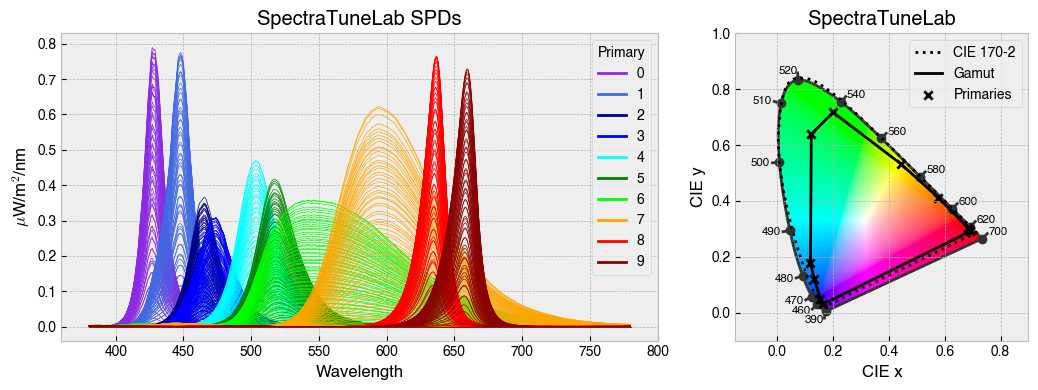

In [3]:
fig = device.plot_calibration_spds_and_gamut()

By default, `StimulationDevice` incorporates the the [CIE026](https://cie.co.at/news/cie-s-0262018-tutorial) photoreceptor action spectra, which are estimates of the spectral sensitivity of retinal photoreceptors. The action spectra are used internally to calculate *a*-opic irradiance, which is the ammount of light 'seen' by individual photoreceptors. 

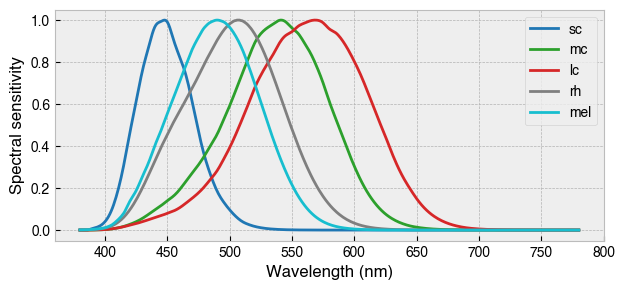

In [4]:
fig = device.observer.plot_action_spectra(figsize=(7.08, 3))

Dealing with non-linearity
--------------------------

Digital light-producing devices tend not to have a linear relationship between requested input and spectral output. On standard computer monitors this is often referred to as a *gamma function*, and often you will hear of a computer monitor being gamma corrected or linearized, which typically involves reversing a function fitted to the data to find the input values needed to achieve linear output.

`StimulationDevice` includes a `.do_gamma()` method that characterises the linearity of each device primary with reverse [beta cumulative distribution function](https://en.wikipedia.org/wiki/Beta_distribution) or [polynomial curve fits](https://en.wikipedia.org/wiki/Polynomial_regression). The interpolated results are saved in a lookup table that contains, for each requested input value, the actual value required to produce linear output.

In [5]:
device.do_gamma(fit='polynomial', poly_order=7, force_origin=True)
device.gamma

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,1,2,3,4,4,5,6,7,...,4084,4085,4087,4089,4090,4092,4094,4095,4095,4095
1,0,0,1,2,3,4,5,6,7,8,...,4031,4033,4035,4037,4039,4041,4043,4045,4047,4049
2,0,0,1,2,3,4,5,6,7,7,...,4084,4085,4085,4086,4086,4087,4087,4088,4088,4089
3,0,0,1,2,3,4,5,6,7,7,...,4008,4009,4010,4012,4013,4015,4016,4018,4019,4021
4,0,1,3,4,6,8,9,11,13,14,...,4063,4063,4064,4065,4066,4066,4067,4068,4069,4070
5,0,1,3,5,6,8,10,11,13,15,...,4077,4078,4079,4079,4080,4081,4081,4082,4083,4084
6,0,1,3,5,6,8,10,11,13,15,...,4053,4054,4055,4056,4057,4057,4058,4059,4060,4061
7,0,2,4,7,9,12,14,17,19,22,...,4068,4068,4069,4070,4070,4071,4072,4072,4073,4074
8,0,0,1,2,3,3,4,5,6,6,...,4006,4008,4011,4013,4016,4018,4021,4023,4026,4029
9,0,0,1,2,3,4,5,6,7,8,...,4018,4019,4021,4022,4023,4024,4026,4027,4028,4030


The gamma table can now be used to linearise the device. Let's plot the gamma results for each primary and show the corrected values.

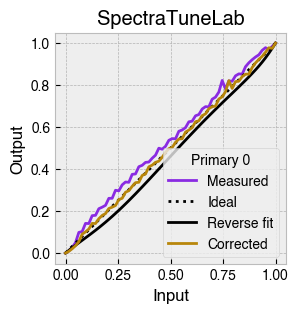

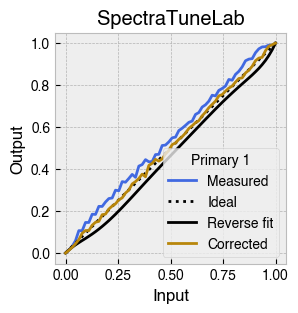

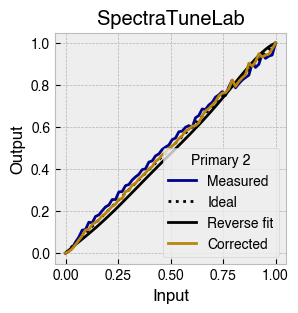

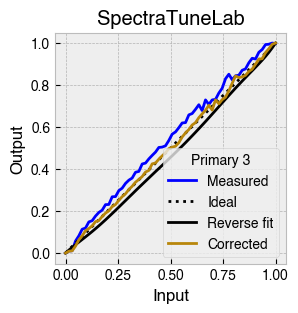

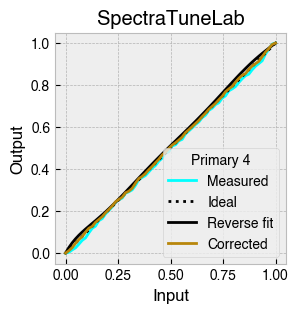

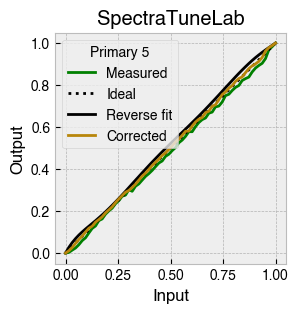

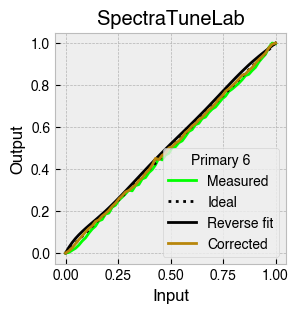

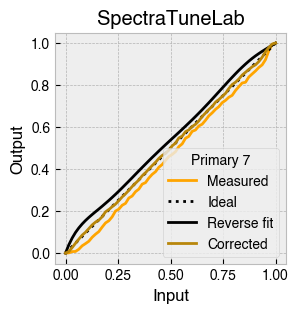

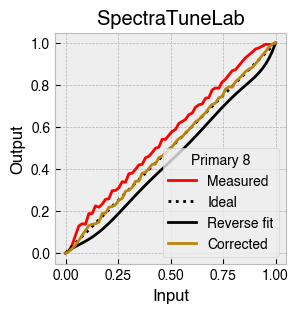

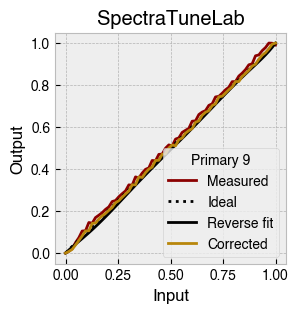

In [6]:
device.plot_gamma(show_corrected=True)

Predicting spectral output
--------------------------

The spectral output for a chosen primary at a given setting can be predicted with the `.predict_primary_spd(...)` method. This method simply interpolates between the measured spectra provided in the calibration data. 

Wavelength
380    0.000356
381    0.000329
382    0.000395
383    0.000438
384    0.000370
         ...   
776    0.000138
777    0.000124
778    0.000126
779    0.000112
780    0.000138
Name: Primary 2 (half power), Length: 401, dtype: float64


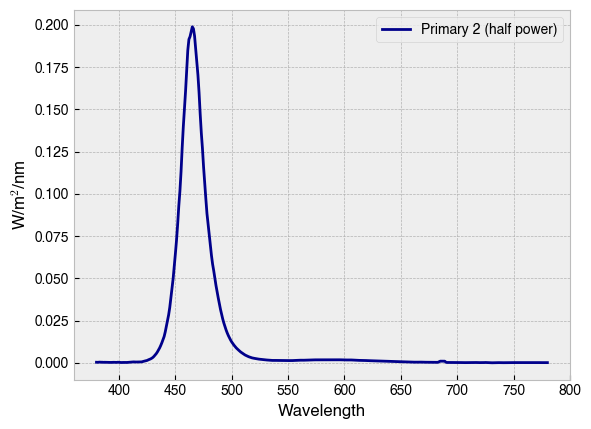

In [7]:
primary_spd = device.predict_primary_spd(
    primary=2, 
    primary_input=.5,
    name='Primary 2 (half power)'
)
print(primary_spd)
primary_spd.plot(ylabel='W/m$^2$/nm', c=device.primary_colors[2], legend=True);

One can also predict the spectral output for a combination of primaries and settings with `.predict_multiprimary_spd(...)`. This method calls the previous method for each primary/setting pair and sums the spectral power distributions.

Predicted spectral output for device settings:
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

Wavelength
380    0.007696
381    0.008681
382    0.009253
383    0.009193
384    0.008020
         ...   
776    0.007136
777    0.007279
778    0.007225
779    0.006890
780    0.006819
Name: All channels at half max, Length: 401, dtype: float64


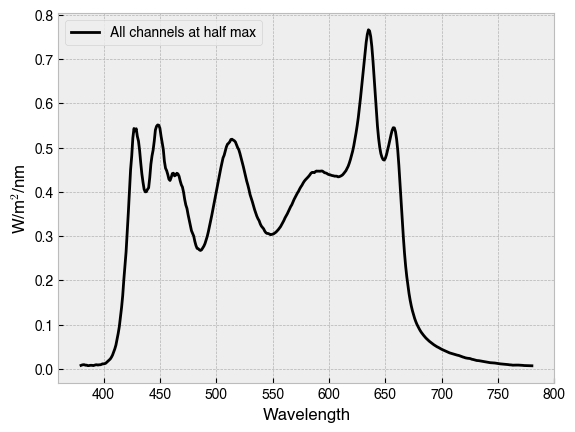

In [8]:
all_primaries_half_max = [.5] * device.nprimaries

half_max_spd = device.predict_multiprimary_spd(
    multiprimary_input=all_primaries_half_max, 
    name='All channels at half max'
)

half_max_spd.plot(
    legend=True, ylabel='W/m$^2$/nm', color='k'
)
print(f'Predicted spectral output for device settings:\n {all_primaries_half_max}\n')
print(half_max_spd)

One can calculate *a*-opic irradiance with the `.predict_multiprimary_aopic(...)` method, which weights a predicted spectrum by the action spectrum for each photoreceptor. 

Predicted a-opic irradiance for device settings:
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

sc     22.990637
mc     40.281301
lc     49.550207
rh     38.653506
mel    34.985300
Name: Half max $a$-opic, dtype: float64


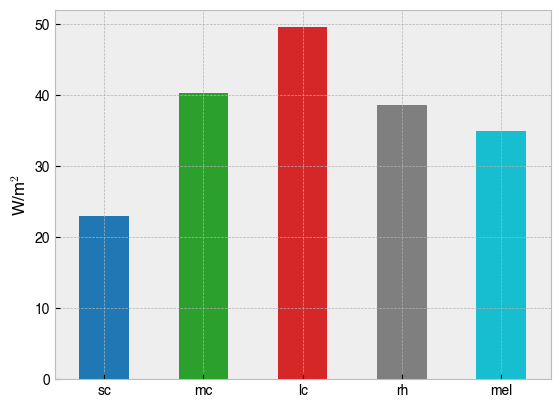

In [9]:
half_max_aopic = device.predict_multiprimary_aopic(
    multiprimary_input=all_primaries_half_max, 
    name='Half max $a$-opic'
)

half_max_aopic.plot(
    kind='bar', 
    color=device.observer.photoreceptor_colors.values(), 
    ylabel='W/m$^2$',
    rot=0
)

print(f'Predicted a-opic irradiance for device settings:\n {all_primaries_half_max}\n')
print(half_max_aopic)

Settings vs. weights
--------------------

When predicting device output, one can use device settings in the native resolution or floating point weights between 0-1. The latter are used internally for convenience and precision, but one can convert back and forth between settings and weights with the `.s2w(...)` and `.w2s(...)` methods.

In [10]:
settings = [2047] * device.nprimaries
settings

[2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047]

In [11]:
# Convert settings to weights
weights = device.s2w(settings)
weights

[0.4998778998778999,
 0.4998778998778999,
 0.4998778998778999,
 0.4998778998778999,
 0.4998778998778999,
 0.4998778998778999,
 0.4998778998778999,
 0.4998778998778999,
 0.4998778998778999,
 0.4998778998778999]

In [12]:
# Convert back to settings
settings = device.w2s(weights)
settings

[2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047]

Finding a target spectrum
-------------------------

If you need to find a spectrum with a specific chromaticity and luminance, you can use `.find_Settings_xyY(...)`.

basinhopping step 0: f 0.618782
basinhopping step 1: f 0.11714 trial_f 0.11714 accepted 1  lowest_f 0.11714
found new global minimum on step 1 with function value 0.11714
basinhopping step 2: f 4.76585e-08 trial_f 4.76585e-08 accepted 1  lowest_f 4.76585e-08
found new global minimum on step 2 with function value 4.76585e-08
Requested LMS: L    8.737379
M    7.810517
S    4.455637
dtype: float64
Solution LMS: [ 8.73754327  7.81047938  4.45549767]


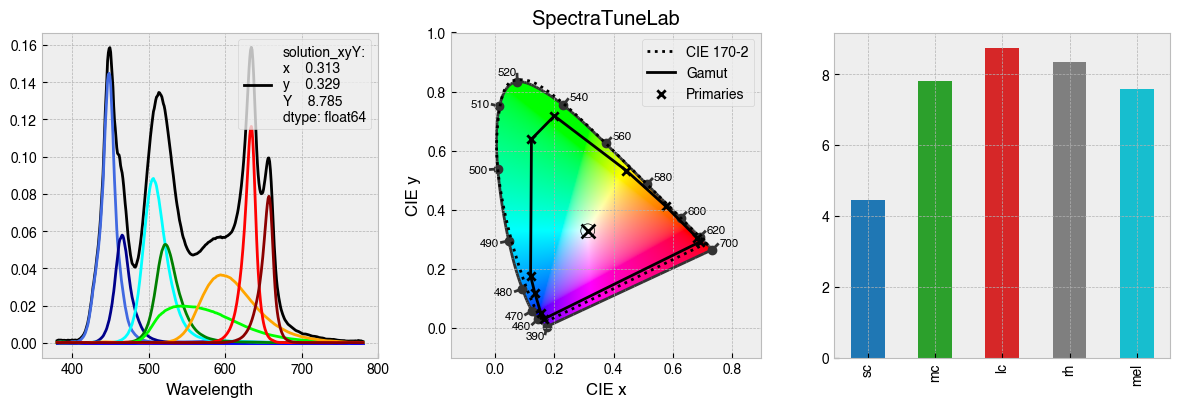

In [13]:
target_xy=[0.31271, 0.32902]
target_luminance=6000.
result = device.find_settings_xyY(target_xy, target_luminance)

`.find_settings_xyY(...)` returns an `OptimisationResult` from `SciPy`. To have your device produce this spectrum, you will need to convert the result to the native resolution before plugging them in.

In [14]:
settings = device.w2s(result.x)
settings

[884, 56, 148, 430, 1339, 313, 368, 0, 0, 4095]

Making a configuration file
---------------------------

When working with different devices or calibration files it may be more convenient to instantiate `StimulationDevice` from a json configuration file using the `.from_json(...)` constructor. Here is an example configuration script to generate a json file with the required arguments.


In [15]:
import json


# Configure device
CALIBRATION = "/Users/jtm545/Projects/PySilSub/pysilsub/data/ProPixx.csv"
CALIBRATION_WAVELENGTHS = [380, 781, 1]
PRIMARY_RESOLUTIONS = [255] * 3
PRIMARY_COLORS = ["red", "green", "blue"]
CALIBRATION_UNITS = "Counts/s/nm"
NAME = "ProPixx Projector"
JSON_NAME = "ProPixx"
NOTES = (
    "VPixx ProPixx projector at the York Neuroimaging Center. Spectra were "
    "measured with an OceanOptics Jaz spectrometer using a long fiber optic "
    "cable."
)


def device_config():

    config = {
        "calibration": CALIBRATION,
        "calibration_wavelengths": CALIBRATION_WAVELENGTHS,
        "primary_resolutions": PRIMARY_RESOLUTIONS,
        "primary_colors": PRIMARY_COLORS,
        "name": NAME,
        "calibration_units": CALIBRATION_UNITS,
        "json_name": JSON_NAME,
        "notes": NOTES,
    }

    json.dump(config, open(f"../../pysilsub/data/{JSON_NAME}.json", "w"), indent=4)


if __name__ == "__main__":
    device_config()


Now we can instantiate from the json file.

In [16]:
device = StimulationDevice.from_json('../../pysilsub/data/ProPixx.json')
device.config

{'calibration': '/Users/jtm545/Projects/PySilSub/pysilsub/data/ProPixx.csv',
 'calibration_wavelengths': [380, 781, 1],
 'primary_resolutions': [255, 255, 255],
 'primary_colors': ['red', 'green', 'blue'],
 'name': 'ProPixx Projector',
 'calibration_units': 'Counts/s/nm',
 'json_name': 'ProPixx',
 'notes': 'VPixx ProPixx projector at the York Neuroimaging Center. Spectra were measured with an OceanOptics Jaz spectrometer using a long fiber optic cable.'}

Package data
------------

*PySilSub* comes with calibration and configuration data for various multiprimary stimulation systems. This means you can experiment with the package without having to calibrate and configure your own system.

In [14]:
available = StimulationDevice.show_package_data(verbose=False)
available

['STLAB_2_York',
 'OneLight',
 'CRT',
 'ProPixx',
 'BCGAR',
 'VirtualSky',
 'STLAB_1_York']

One can easily create a `StimulationDevice` from example package data. 

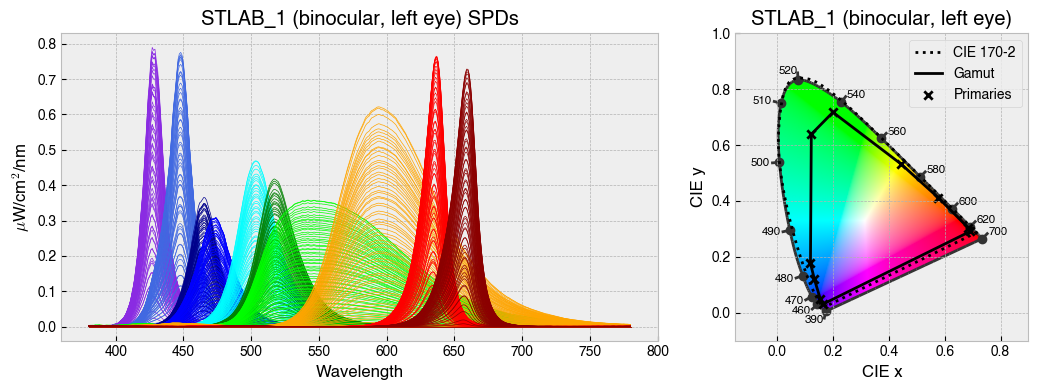

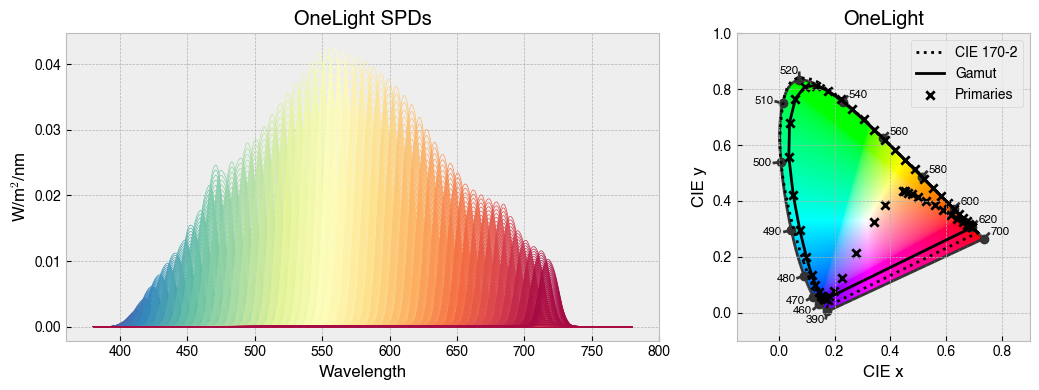

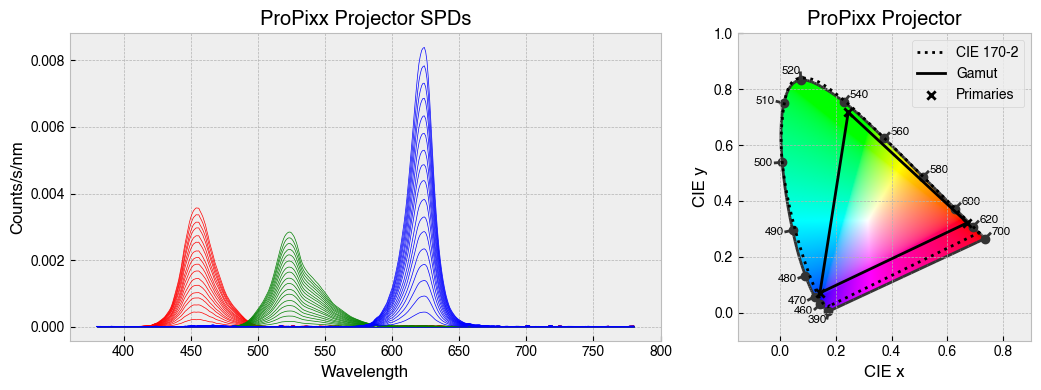

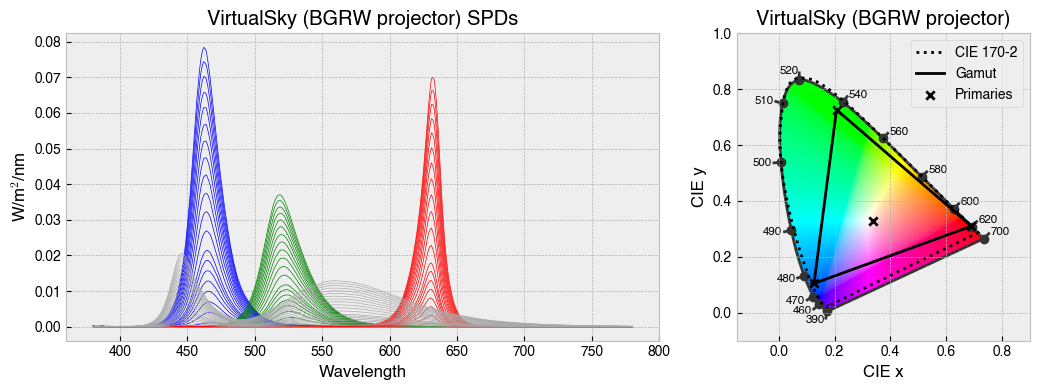

In [15]:
from pprint import pprint

for device in ['STLAB_1_York', 'OneLight', 'ProPixx', 'VirtualSky']:
    device = StimulationDevice.from_package_data(device)
    fig = device.plot_calibration_spds_and_gamut(spd_kwargs={'legend':False})
